# Project: Investigate why patient does not show up on appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Sometimes, patients do not show up on their patients. There are several reasons causing this to happen. The data that is used in this project was collected from 100k medical appointments in Brazil. 
>
> In the dataset, a number of characteristics about the patient are included, including ScheduledDay(what day the patient set up their appointment), Neighborhood(the location of the hospital), Scholarship(whether or not the patient is enrolled in Brasilian welfare program Bolsa Família). In total, there are 110527 samples and 14 characteristics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

all_df = pd.read_csv('data/noshowappointments.csv')

In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> Since ScheduledDay and AppointmentDay are of type Object(Strings), they are needed to be converted to datetime.
>
> To get insight on why patients skip appointments, PatientId, AppointmentID, Neighbourhood are unnecessary.
>
> Column labels need to be rewritten for easy accessability.

In [4]:
all_df.isnull().values.sum() # Check for how many values are null

0

> Because df.isnull().values.sum() equals to 0, there is no missing data in this dataset.

In [5]:
sum(all_df.duplicated()) # check for the number of duplicated samples

0

> There is no duplicated sample.

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [7]:
df = all_df.drop(columns=['PatientId', 'AppointmentID', 'Neighbourhood']) # drop unrelated columns

In [8]:
# rename column label for easy processing later
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True) 

In [9]:
# Parse string dates to datetime objects
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 9.3+ MB


In [11]:
df_yes = df[df['no_show']=='Yes'] # df_yes contains samples with no show up

In [12]:
df_yes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22319 entries, 6 to 110516
Data columns (total 11 columns):
gender            22319 non-null object
scheduledday      22319 non-null datetime64[ns]
appointmentday    22319 non-null datetime64[ns]
age               22319 non-null int64
scholarship       22319 non-null int64
hipertension      22319 non-null int64
diabetes          22319 non-null int64
alcoholism        22319 non-null int64
handcap           22319 non-null int64
sms_received      22319 non-null int64
no_show           22319 non-null object
dtypes: datetime64[ns](2), int64(7), object(2)
memory usage: 2.0+ MB


In [13]:
df_yes['no_show'].unique()

array(['Yes'], dtype=object)

In [14]:
df_yes = df_yes.drop(columns=['no_show']) # drop unnecessary column since all samples have the same values

In [15]:
df_no = df[df['no_show']=='No'] # df_no contains samples with show up
df_no = df_no.drop(columns=['no_show'])

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

In [16]:
df_yes.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
6,F,2016-04-27 15:05:12,2016-04-29,23,0,0,0,0,0,0


In [17]:
df_yes['sms_received'].unique()

array([0, 1])

In [18]:
df_yes['handcap'].unique()

array([0, 1, 2, 3, 4])

In [19]:
df_yes['alcoholism'].unique()

array([0, 1])

In [20]:
df_yes['diabetes'].unique()

array([0, 1])

In [21]:
df_yes['hipertension'].unique()

array([0, 1])

In [22]:
df_yes['scholarship'].unique()

array([0, 1])

In [23]:
df_yes['age'].max()

115

In [24]:
df_no.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0


In [25]:
df_yes.shape

(22319, 10)

In [26]:
df_no.shape

(88208, 10)

### Research Question 1 - What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

#### Age

In [27]:
bins = np.array([i*10 for i in range(df_yes['age'].max()) if i*10 <= 120])
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120])

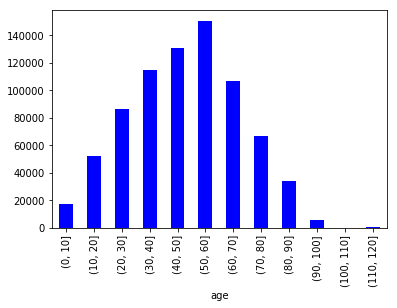

In [28]:
yes_groups = df_yes.groupby((pd.cut(df_yes.age, bins)))
yes_groups['age'].sum()
yes_groups['age'].sum().plot(kind='bar', color='b')

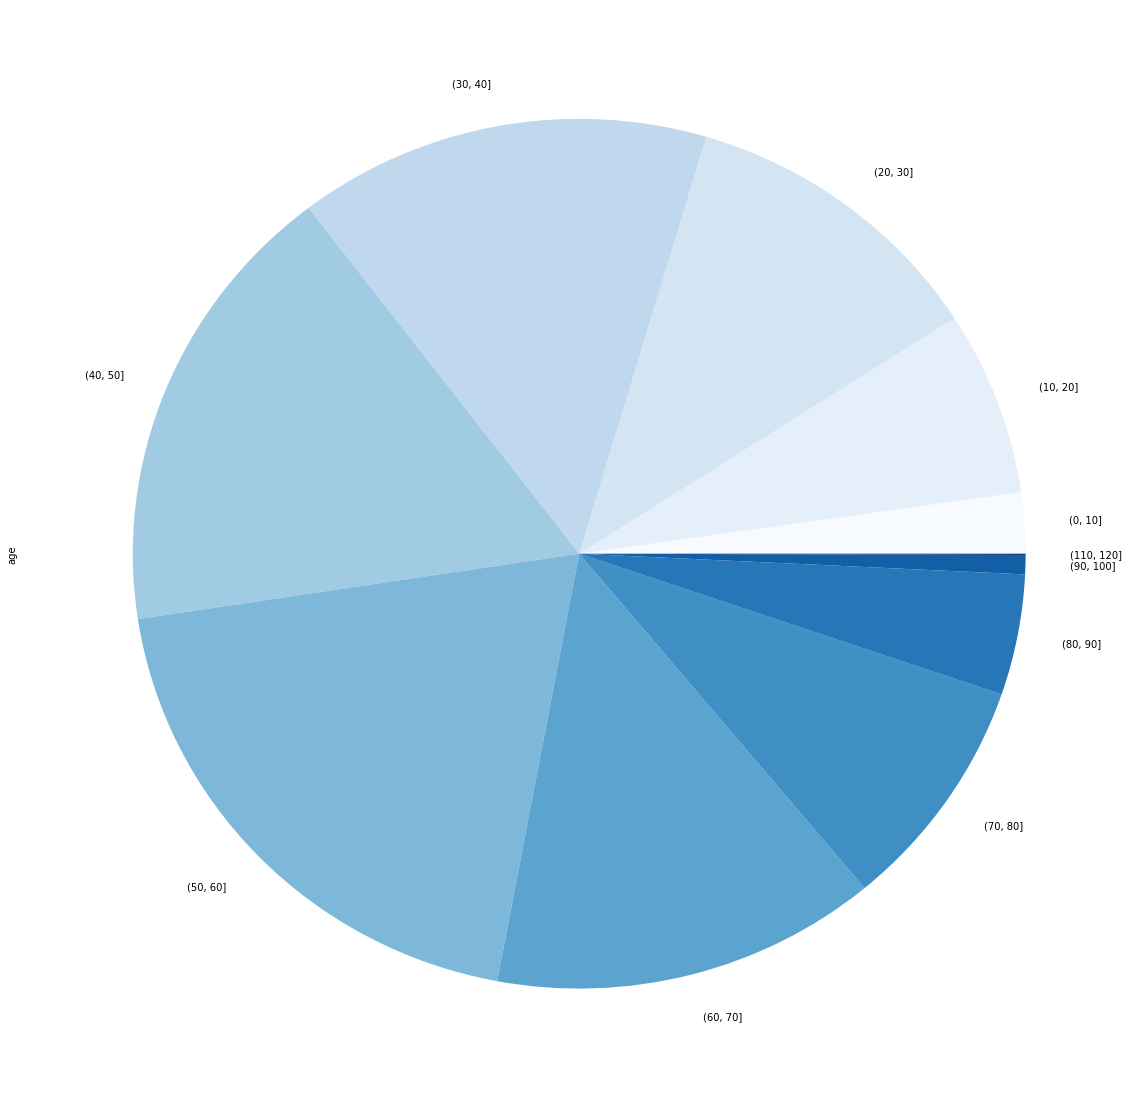

In [29]:
yes_groups['age'].sum().plot(kind='pie', colormap='Blues', figsize=(20, 20))

> By looking at both the bar chart and the pie chart, three age groups skip the appointments the most

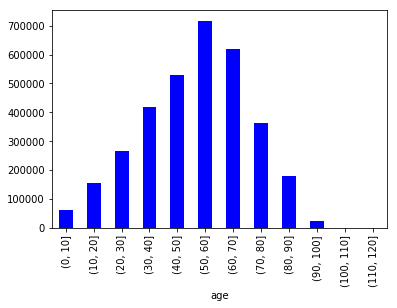

In [30]:
no_groups = df_no.groupby((pd.cut(df_no.age, bins)))
no_groups['age'].sum()
no_groups['age'].sum().plot(kind='bar', color='b')

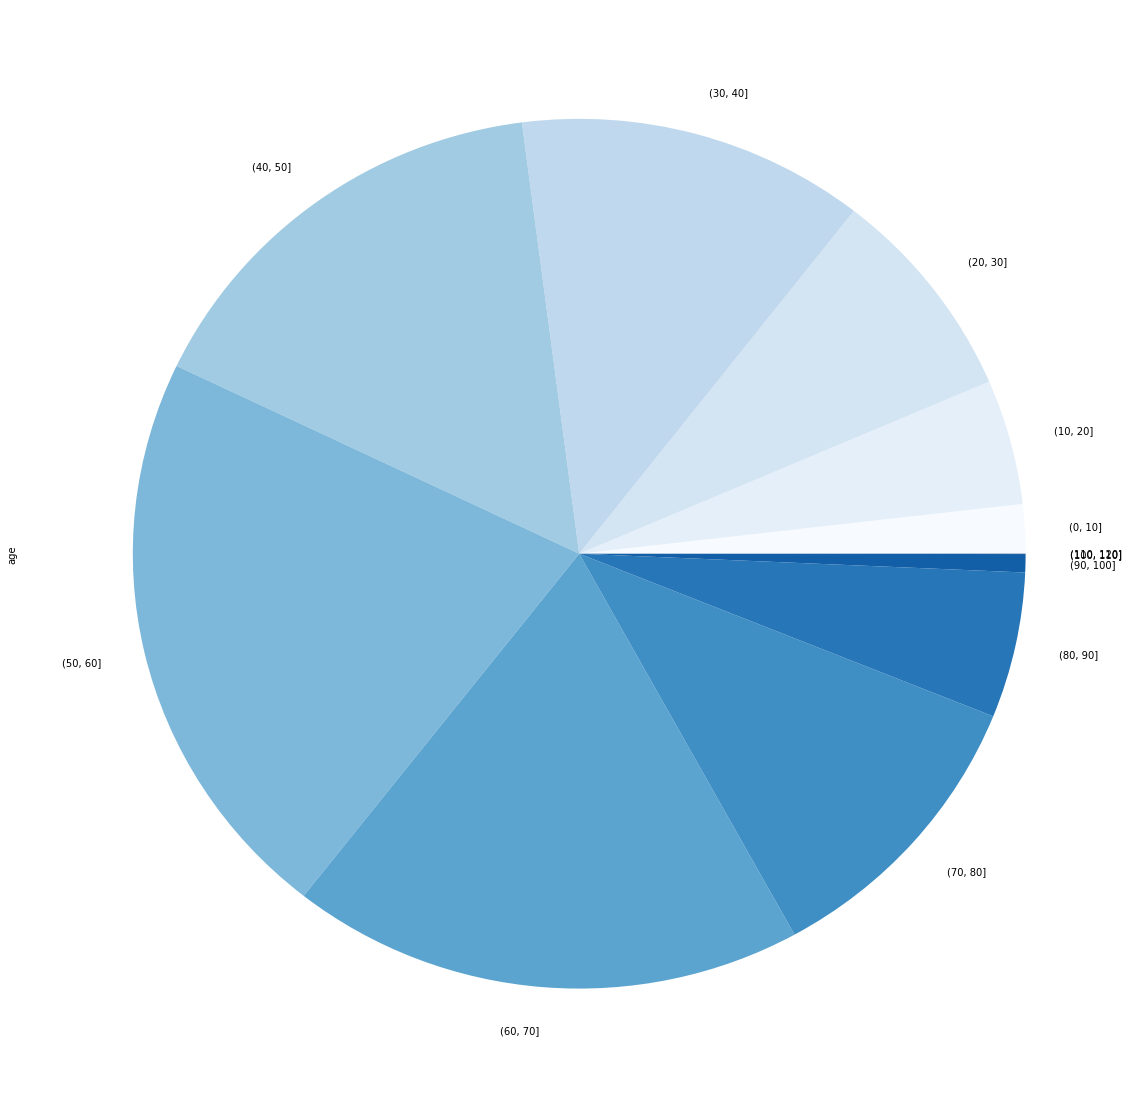

In [31]:
no_groups['age'].sum().plot(kind='pie', colormap='Blues', figsize=(20, 20))

### Research Question 2  (Replace this header name!)

In [32]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!